## Image Reading

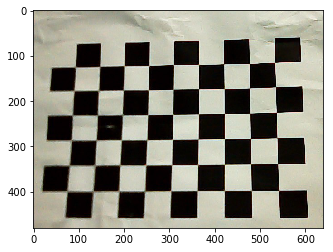

In [52]:
    import numpy as np
    import cv2
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline
    img = cv2.imread('./calibration_images/9.png')
    plt.imshow(img)

## Chessboard Finding Trial

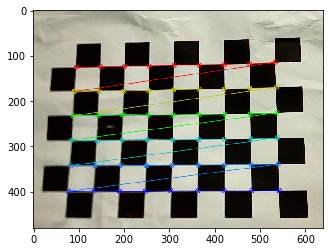

In [53]:
nx = 9
ny = 6

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret , corners = cv2.findChessboardCorners(gray, (nx, ny), None)

if ret == True:
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

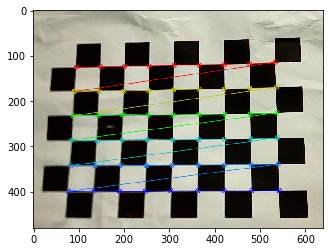

In [55]:
import glob

images = glob.glob('./calibration_images/*.png')
objpoints = [] # 3D Points
imgpoints = [] # 2D Points

nx = 9
ny = 6

objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) # x,y coordinates

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret , corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)
    

## Camera Calibration

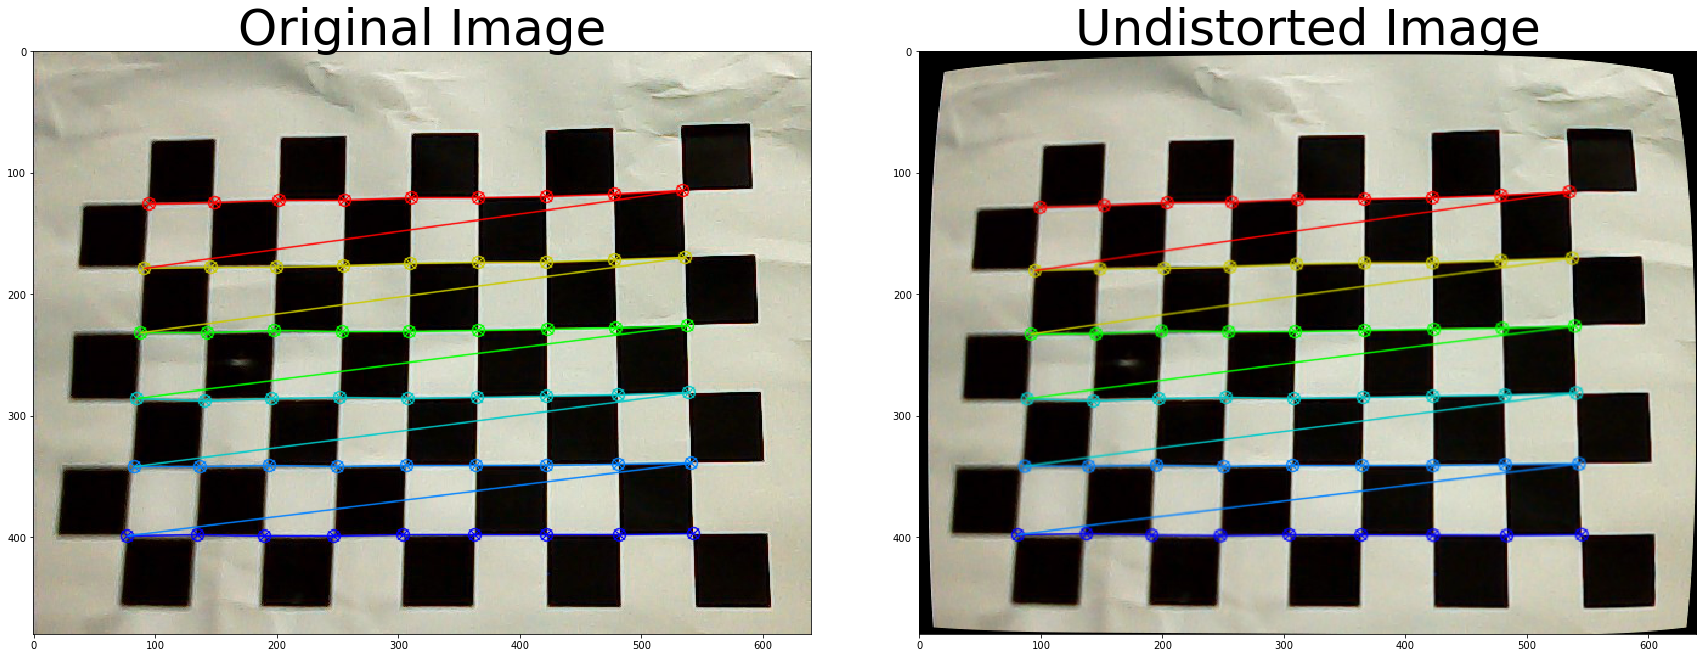

In [56]:
def cal_undistort(img, objpoints, imgpoints):
    img_size = (img.shape[1], img.shape[0])
    
    # Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst
    
undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)